In [1]:
# K-nearst algo
#closet neighbors
# d(euclidian dist formula)=sqt((p1-q1)^2 +(p2 - q2)^2+.......+)
# (sweetness, chrunchinese)
# dist with tomato when p1 = 6 & p2 = 4
# grape =(8, 5)      =>2.2
# green bean =(3, 7) =>4.2
# nuts = (3, 6)      =>3.6
# orange = (7, 3)    =>1.4

In [2]:
#dataset: iris.csv

### Import the libraries`

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load the data

In [4]:
df= pd.read_csv('iris.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


#### Separate the input and output

In [5]:
x =df.drop('species', axis = 1)
y = df['species']

In [6]:
x.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Explore

In [7]:
y.value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

### Normalize the data

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

### Cross Validation

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [11]:
x_train.shape

(112, 4)

In [12]:
x_test.shape

(38, 4)

### Build the Model

In [13]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors = 5)
clf.fit(x_train, y_train)

KNeighborsClassifier()

### Evaluate the performance

In [16]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

In [18]:
y_pred = clf.predict(x_test)

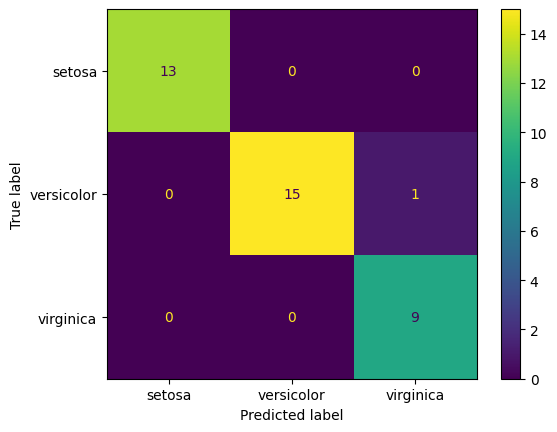

In [20]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

In [21]:
accuracy_score(y_test, y_pred)

0.9736842105263158

In [22]:
new =pd.DataFrame({
    'sepal_length':[5.7, 5.4, 6.2],
    'sepal_width':[2.5, 3.9, 2.2],
    'petal_length':[5, 1.3, 4.5],
    'petal_width':[2, 0.4, 1.5]
})
new

,sepal_length,sepal_width,petal_length,petal_width
0,5.7,2.5,5.0,2.0
1,5.4,3.9,1.3,0.4
2,6.2,2.2,4.5,1.5


In [26]:
import warnings

warnings.filterwarnings("ignore", message="X does not have valid feature names")

In [27]:
clf.predict(scaler.transform(new))

array(['setosa', 'setosa', 'setosa'], dtype=object)